<a href="https://colab.research.google.com/github/kittu1233/Churnprediction/blob/main/churnpredic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

try:
    df = pd.read_csv('Churn_Modelling.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Churn_Modelling.csv' not found.")
    df = None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))
print("\nExited Column Distribution:\n", df['Exited'].value_counts(normalize=True) * 100)

# Distribution of Key Variables
categorical_cols = ['Geography', 'Gender', 'Exited']
for col in categorical_cols:
    print(f"\nDistribution of {col}:\n{df[col].value_counts()}")

Data Shape: (10000, 14)

Data Types:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Percentage of Missing Values:
 RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfP

In [3]:
# Group data and calculate mean churn rate
grouped_data = df.groupby(['Geography', 'Gender', 'NumOfProducts'])['Exited'].mean().reset_index()
display(grouped_data)

# Group data by age and calculate mean churn rate
age_grouped_data = df.groupby('Age')['Exited'].mean().reset_index()
display(age_grouped_data)

# Analyze relationship between 'Exited' and numerical features
numerical_features = ['CreditScore', 'Balance', 'EstimatedSalary', 'Tenure']
for col in numerical_features:
    try:
        df[f'{col}_quantile'] = pd.qcut(df[col], q=4, labels=False, duplicates='drop')
        quantile_grouped_data = df.groupby(f'{col}_quantile')['Exited'].mean().reset_index()
        display(quantile_grouped_data)
    except ValueError as e:
        print(f"Error processing {col}: {e}")

# Correlation Analysis
correlation_matrix = df[['Exited', 'CreditScore', 'Balance', 'EstimatedSalary', 'Tenure', 'IsActiveMember']].corr()
display(correlation_matrix)

,Geography,Gender,NumOfProducts,Exited
0,France,Female,1,0.278674
1,France,Female,2,0.076564
2,France,Female,3,0.872727
3,France,Female,4,1.000000
4,France,Male,1,0.180973
5,France,Male,2,0.040895
6,France,Male,3,0.693878
7,France,Male,4,1.000000
8,Germany,Female,1,0.471386
9,Germany,Female,2,0.162338


,Age,Exited
0,18,0.090909
1,19,0.037037
2,20,0.050000
3,21,0.056604
4,22,0.142857
...,...,...
65,83,0.000000
66,84,0.500000
67,85,0.000000
68,88,0.000000


,CreditScore_quantile,Exited
0,0,0.219416
1,1,0.210316
2,2,0.181855
3,3,0.203004


,Balance_quantile,Exited
0,0,0.1576
1,1,0.2628
2,2,0.2368


,EstimatedSalary_quantile,Exited
0,0,0.2000
1,1,0.1980
2,2,0.2012
3,3,0.2156


,Tenure_quantile,Exited
0,0,0.211412
1,1,0.205897
2,2,0.186967
3,3,0.204482


,Exited,CreditScore,Balance,EstimatedSalary,Tenure,IsActiveMember
Exited,1.000000,-0.027094,0.118533,0.012097,-0.014001,-0.156128
CreditScore,-0.027094,1.000000,0.006268,-0.001384,0.000842,0.025651
Balance,0.118533,0.006268,1.000000,0.012797,-0.012254,-0.010084
EstimatedSalary,0.012097,-0.001384,0.012797,1.000000,0.007784,-0.011421
Tenure,-0.014001,0.000842,-0.012254,0.007784,1.000000,-0.028362
IsActiveMember,-0.156128,0.025651,-0.010084,-0.011421,-0.028362,1.000000


In [4]:
# Group data and calculate mean churn rate
grouped_data = df.groupby(['Geography', 'Gender', 'NumOfProducts'])['Exited'].mean().reset_index()
display(grouped_data)

# Group data by age and calculate mean churn rate
age_grouped_data = df.groupby('Age')['Exited'].mean().reset_index()
display(age_grouped_data)

# Analyze relationship between 'Exited' and numerical features
numerical_features = ['CreditScore', 'Balance', 'EstimatedSalary', 'Tenure']
for col in numerical_features:
    try:
        df[f'{col}_quantile'] = pd.qcut(df[col], q=4, labels=False, duplicates='drop')
        quantile_grouped_data = df.groupby(f'{col}_quantile')['Exited'].mean().reset_index()
        display(quantile_grouped_data)
    except ValueError as e:
        print(f"Error processing {col}: {e}")

# Correlation Analysis
correlation_matrix = df[['Exited', 'CreditScore', 'Balance', 'EstimatedSalary', 'Tenure', 'IsActiveMember']].corr()
display(correlation_matrix)

,Geography,Gender,NumOfProducts,Exited
0,France,Female,1,0.278674
1,France,Female,2,0.076564
2,France,Female,3,0.872727
3,France,Female,4,1.000000
4,France,Male,1,0.180973
5,France,Male,2,0.040895
6,France,Male,3,0.693878
7,France,Male,4,1.000000
8,Germany,Female,1,0.471386
9,Germany,Female,2,0.162338


,Age,Exited
0,18,0.090909
1,19,0.037037
2,20,0.050000
3,21,0.056604
4,22,0.142857
...,...,...
65,83,0.000000
66,84,0.500000
67,85,0.000000
68,88,0.000000


,CreditScore_quantile,Exited
0,0,0.219416
1,1,0.210316
2,2,0.181855
3,3,0.203004


,Balance_quantile,Exited
0,0,0.1576
1,1,0.2628
2,2,0.2368


,EstimatedSalary_quantile,Exited
0,0,0.2000
1,1,0.1980
2,2,0.2012
3,3,0.2156


,Tenure_quantile,Exited
0,0,0.211412
1,1,0.205897
2,2,0.186967
3,3,0.204482


,Exited,CreditScore,Balance,EstimatedSalary,Tenure,IsActiveMember
Exited,1.000000,-0.027094,0.118533,0.012097,-0.014001,-0.156128
CreditScore,-0.027094,1.000000,0.006268,-0.001384,0.000842,0.025651
Balance,0.118533,0.006268,1.000000,0.012797,-0.012254,-0.010084
EstimatedSalary,0.012097,-0.001384,0.012797,1.000000,0.007784,-0.011421
Tenure,-0.014001,0.000842,-0.012254,0.007784,1.000000,-0.028362
IsActiveMember,-0.156128,0.025651,-0.010084,-0.011421,-0.028362,1.000000


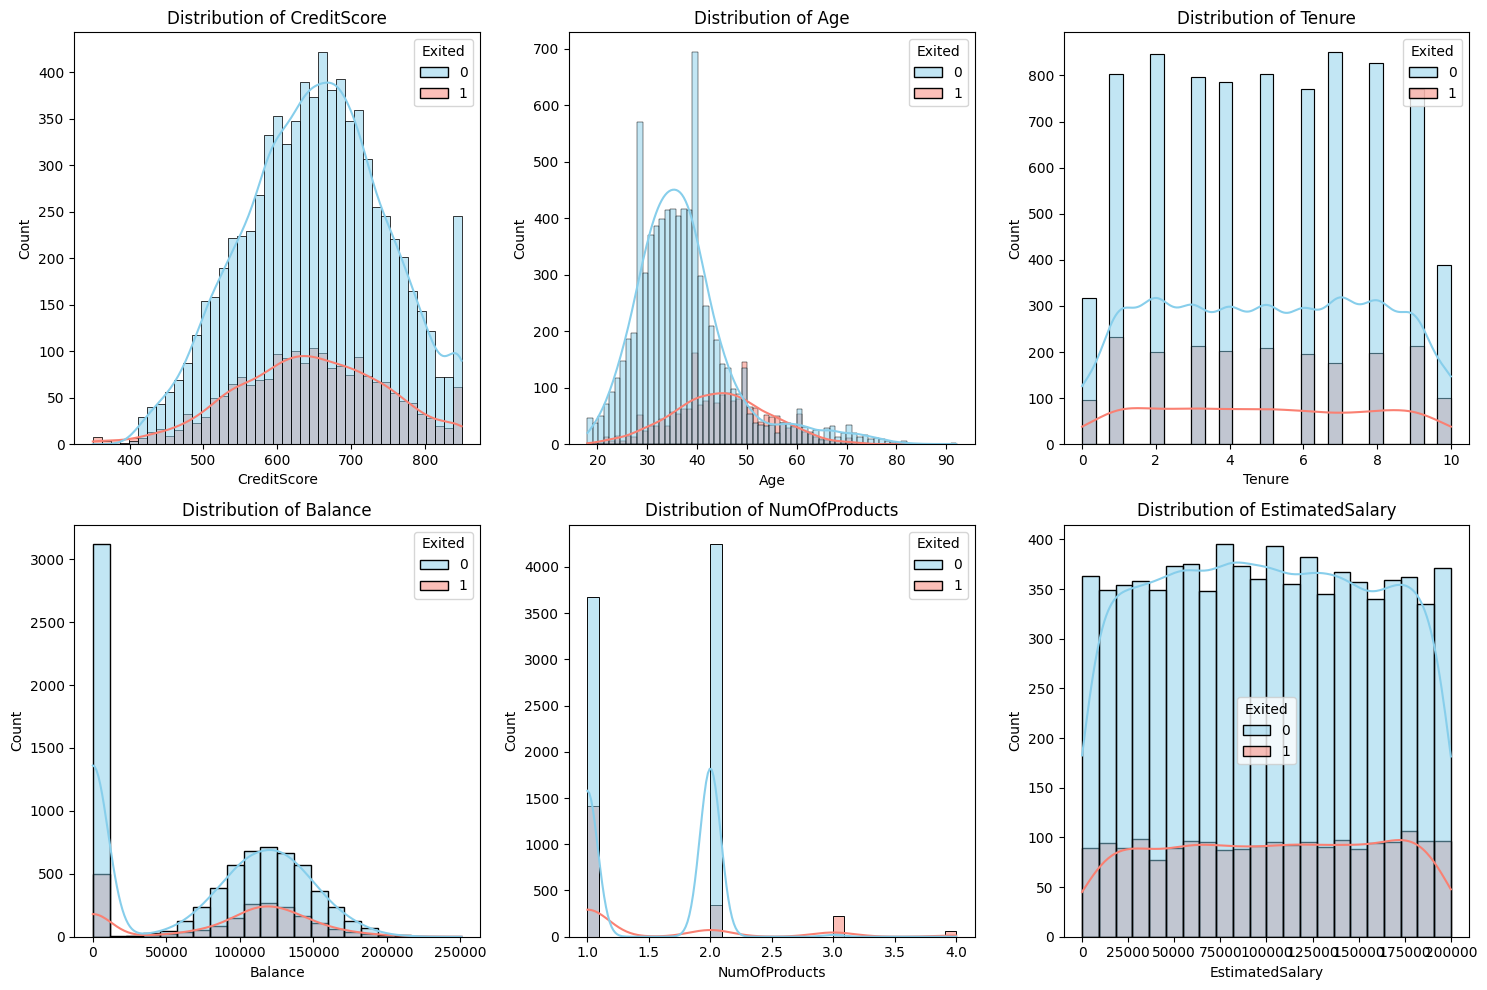

<ipython-input-5-21950127ba47>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y=col, palette=['skyblue', 'salmon'])
<ipython-input-5-21950127ba47>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y=col, palette=['skyblue', 'salmon'])
<ipython-input-5-21950127ba47>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y=col, palette=['skyblue', 'salmon'])
<ipython-input-5-21950127ba47>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

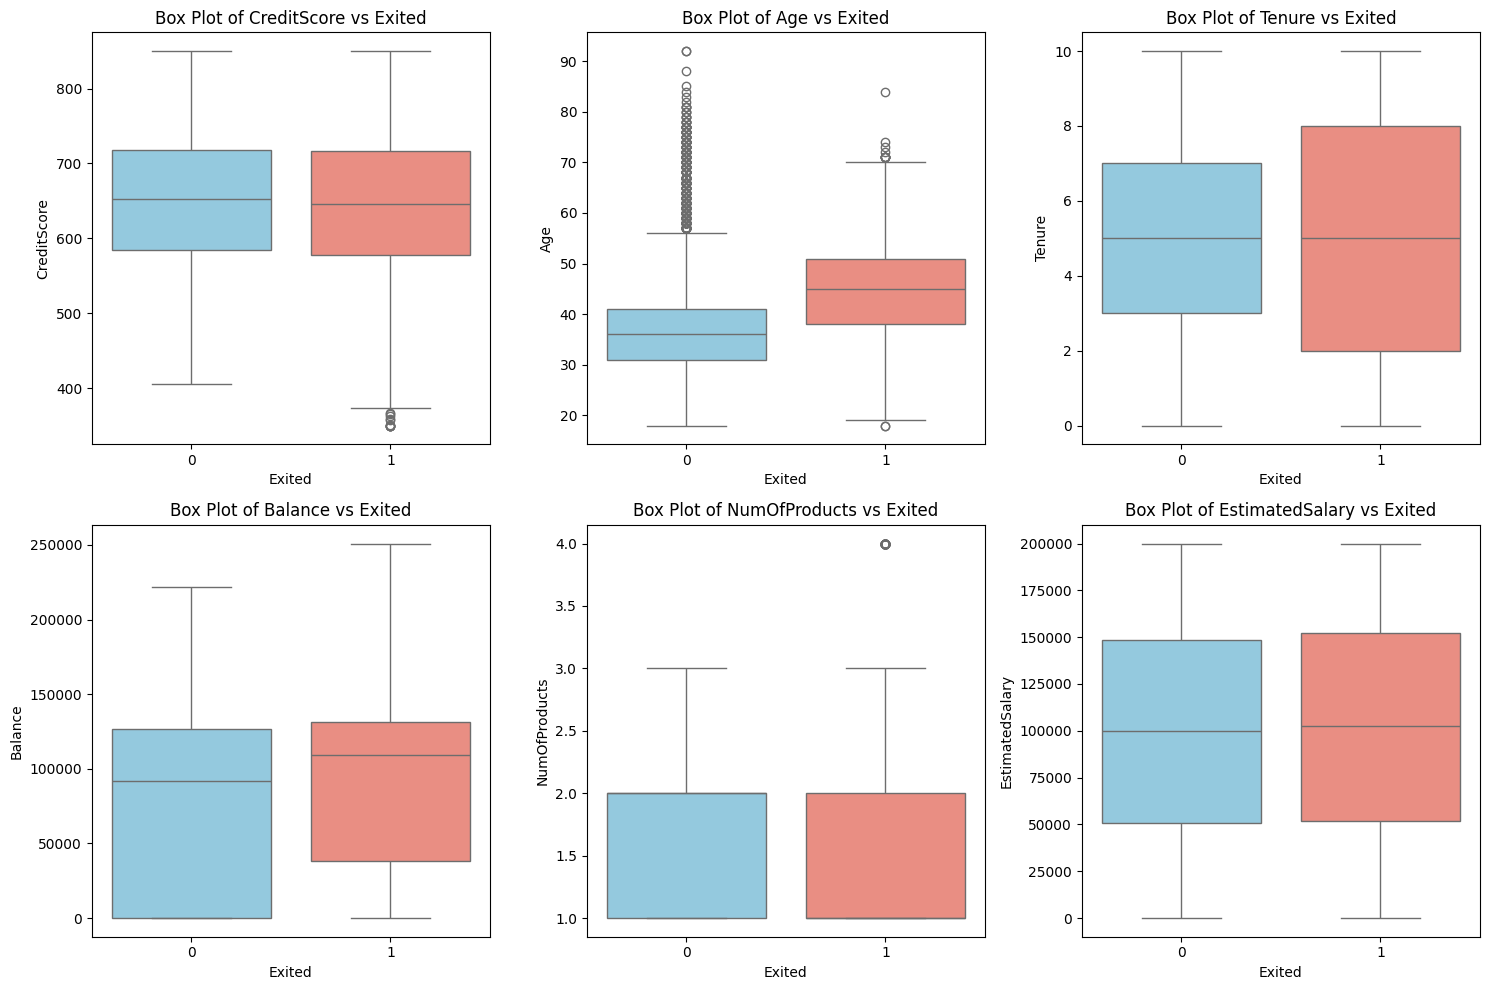

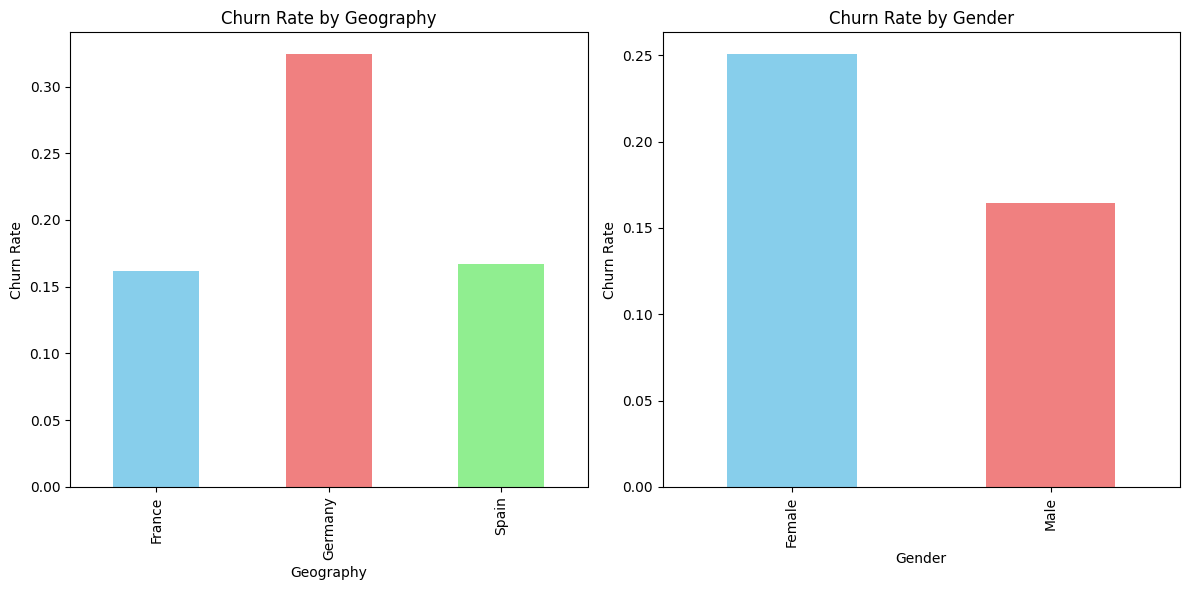

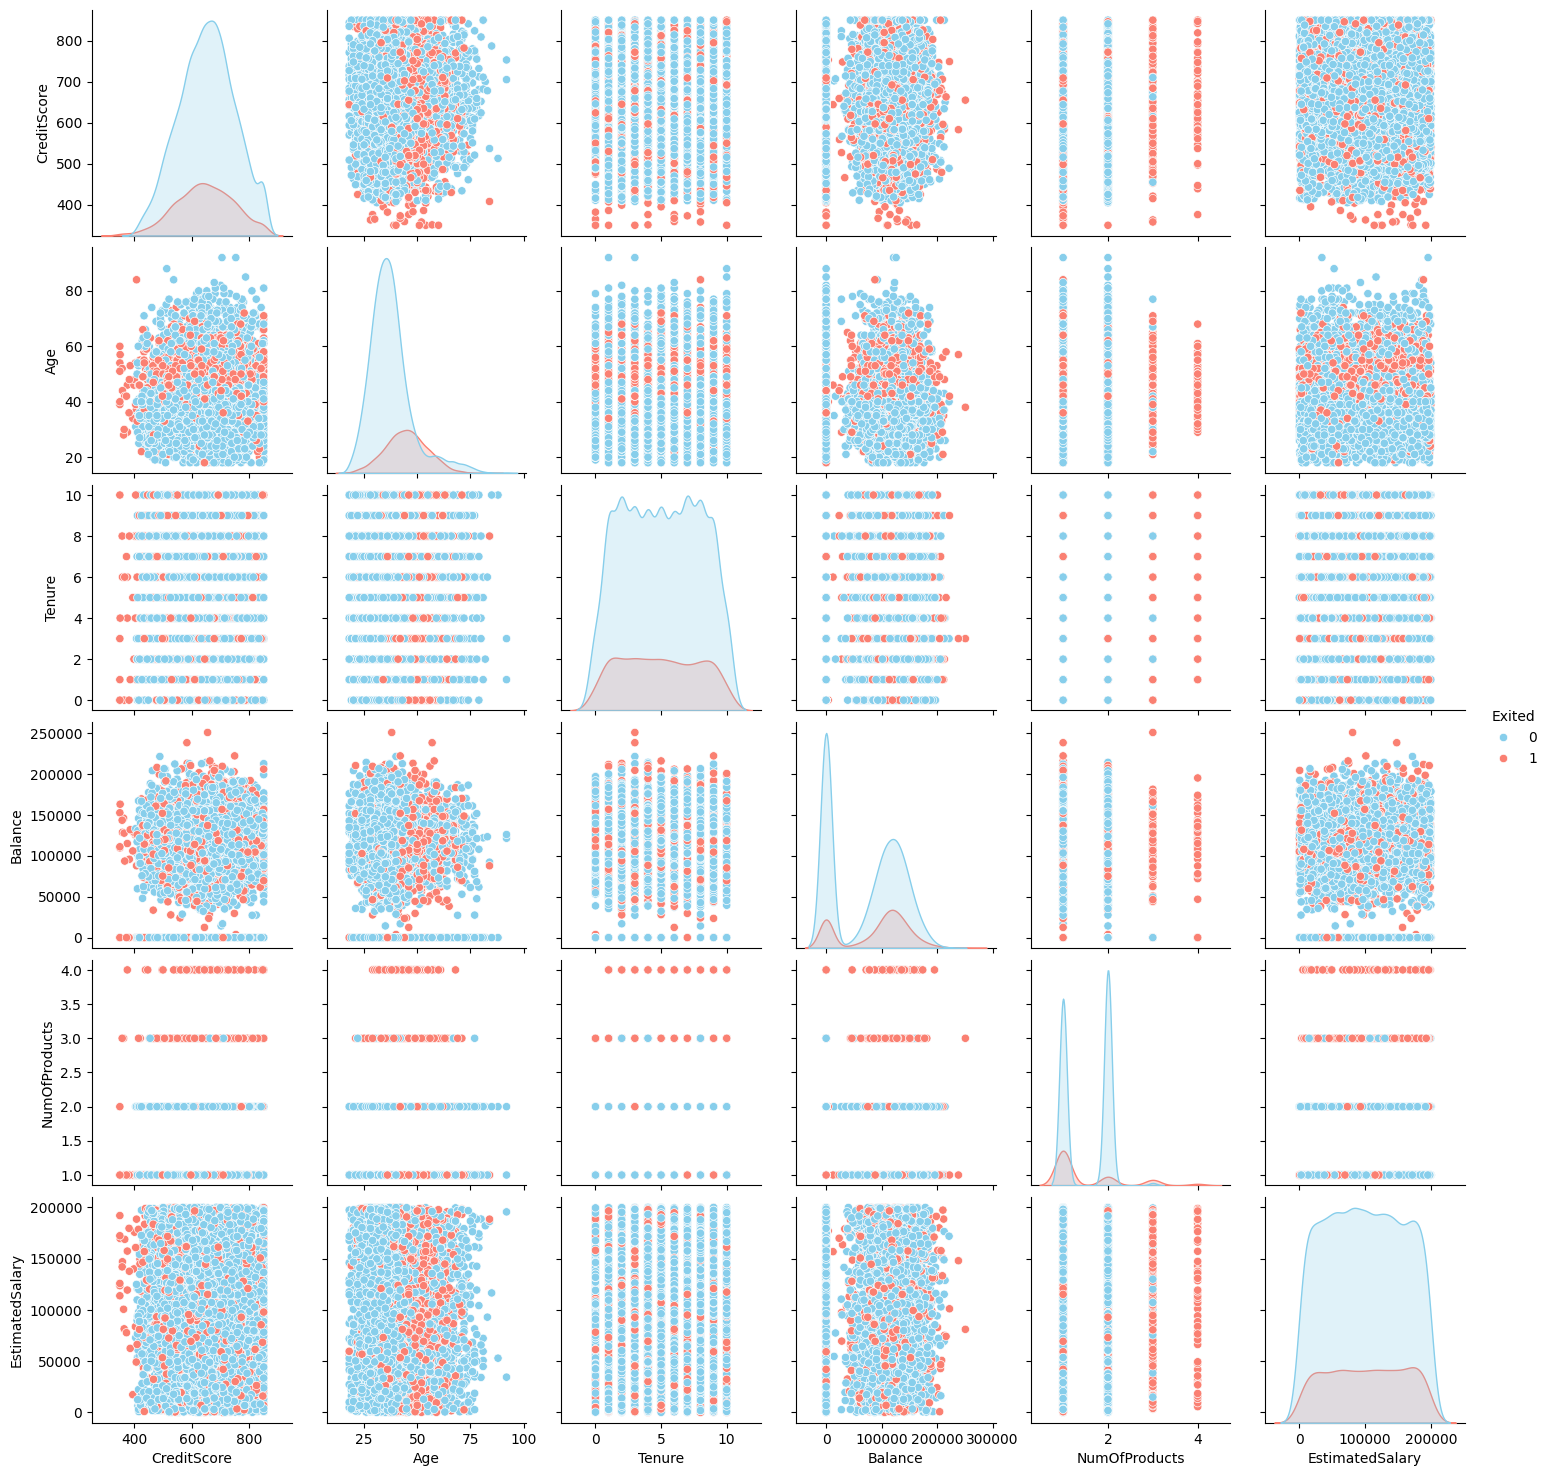

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, hue='Exited', kde=True, palette=['skyblue', 'salmon'])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='Exited', y=col, palette=['skyblue', 'salmon'])
    plt.title(f'Box Plot of {col} vs Exited')
plt.tight_layout()
plt.show()


# Bar charts for categorical features
plt.figure(figsize=(12, 6))

# Geography
plt.subplot(1, 2, 1)
geography_churn = df.groupby('Geography')['Exited'].mean()
geography_churn.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')


# Gender
plt.subplot(1, 2, 2)
gender_churn = df.groupby('Gender')['Exited'].mean()
gender_churn.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


# Scatter plot matrix
sns.pairplot(df, vars=numerical_features, hue='Exited', palette=['skyblue', 'salmon'])
plt.show()

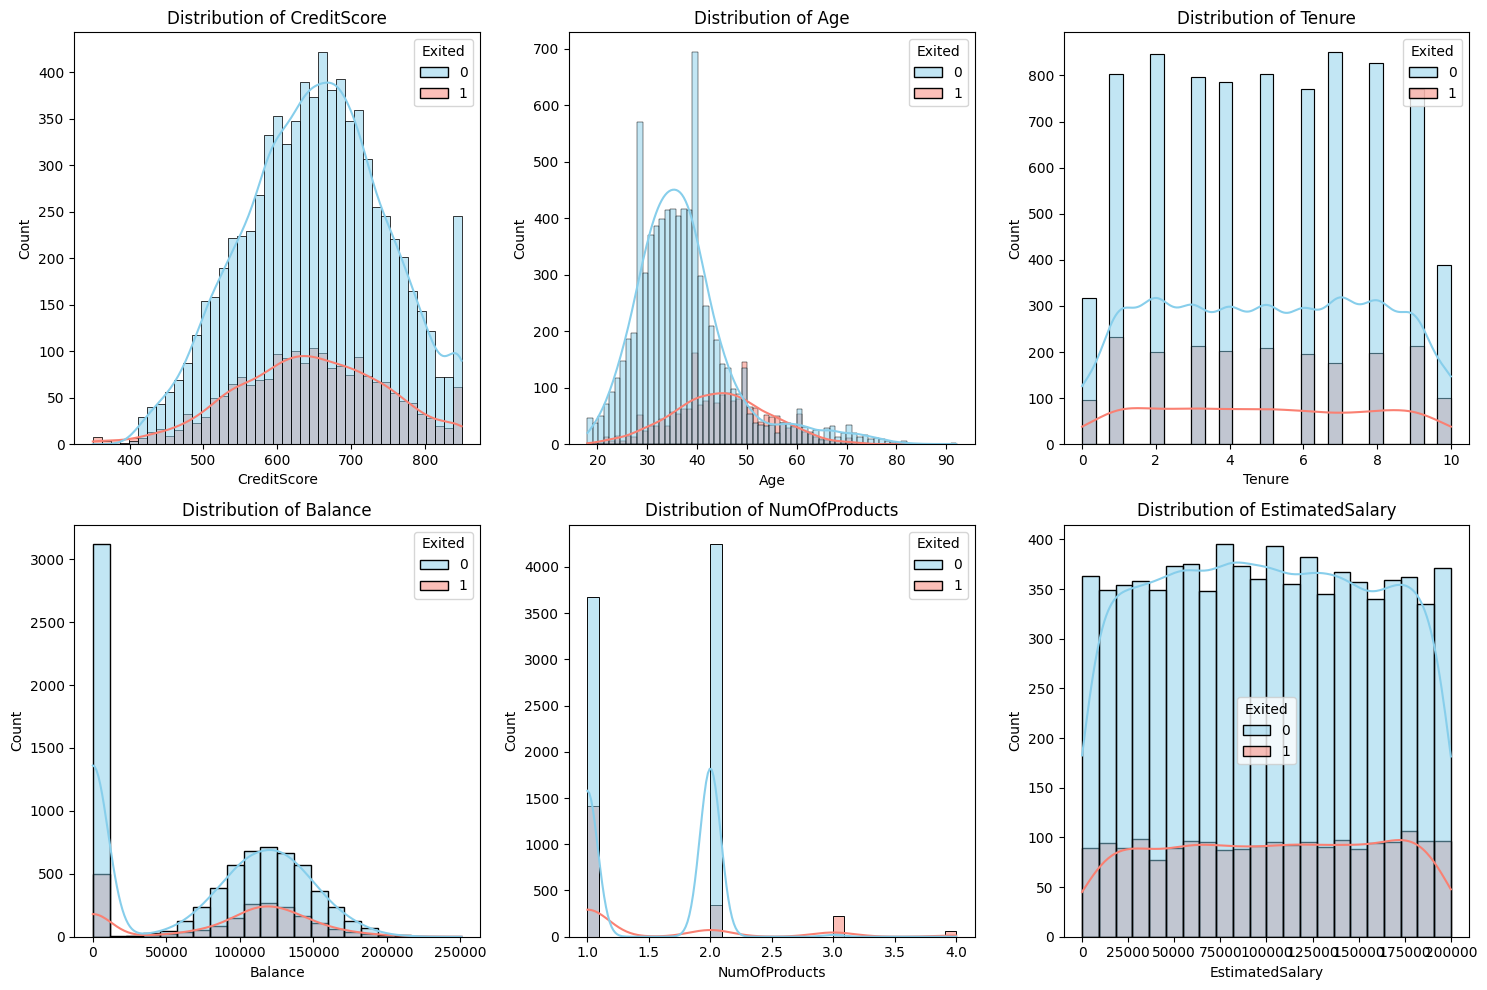

<ipython-input-6-8f77c0be47e1>:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


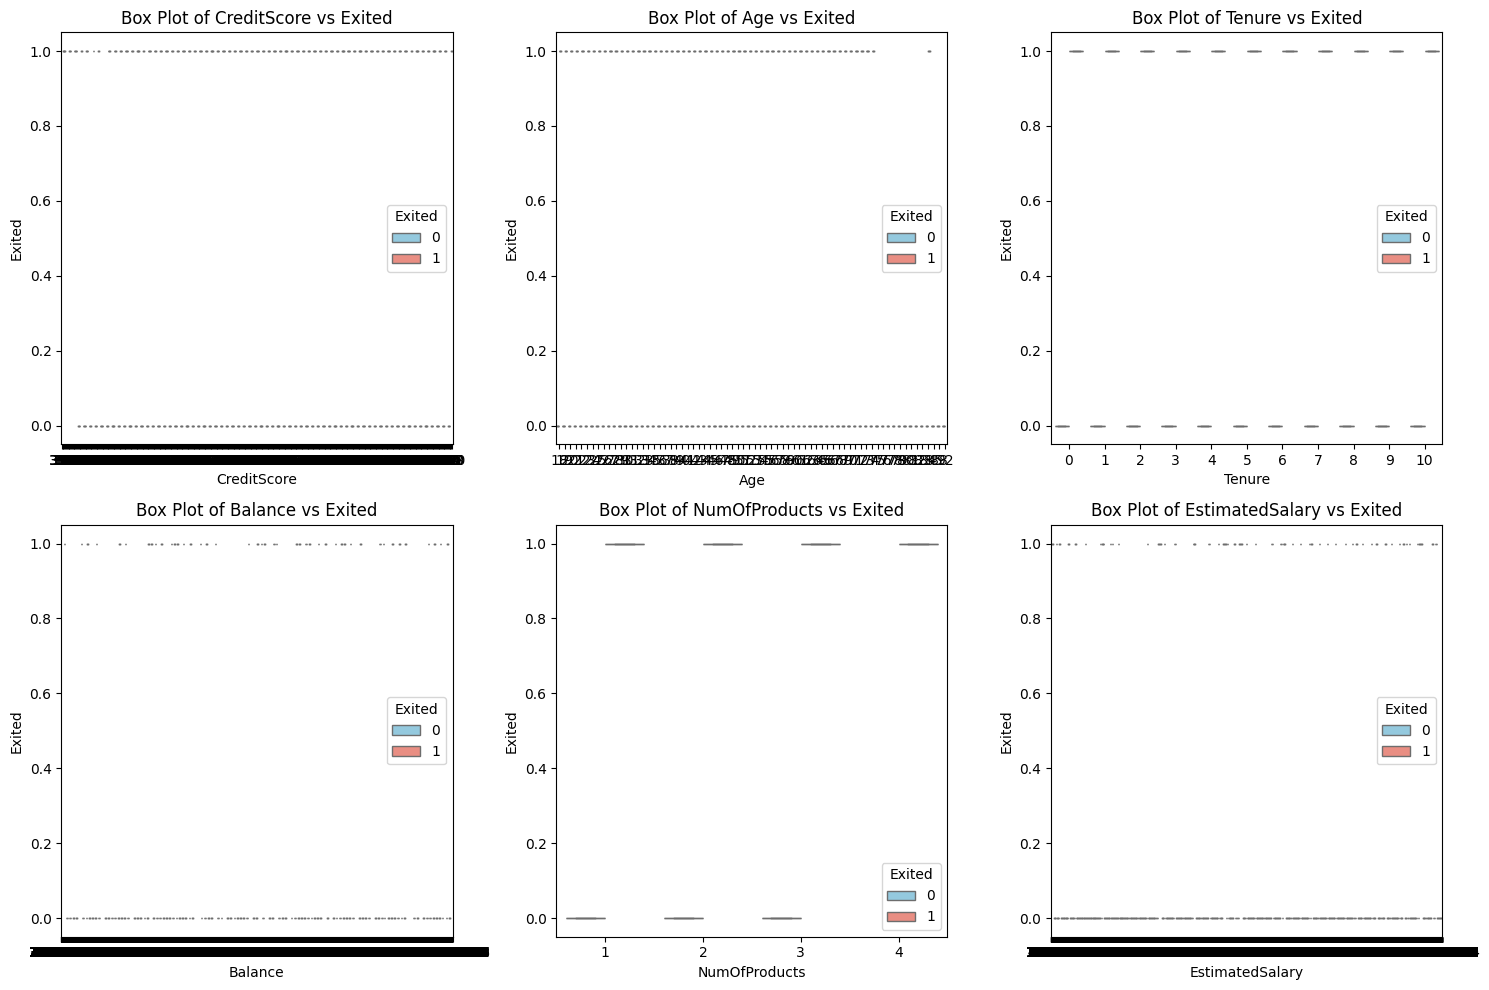

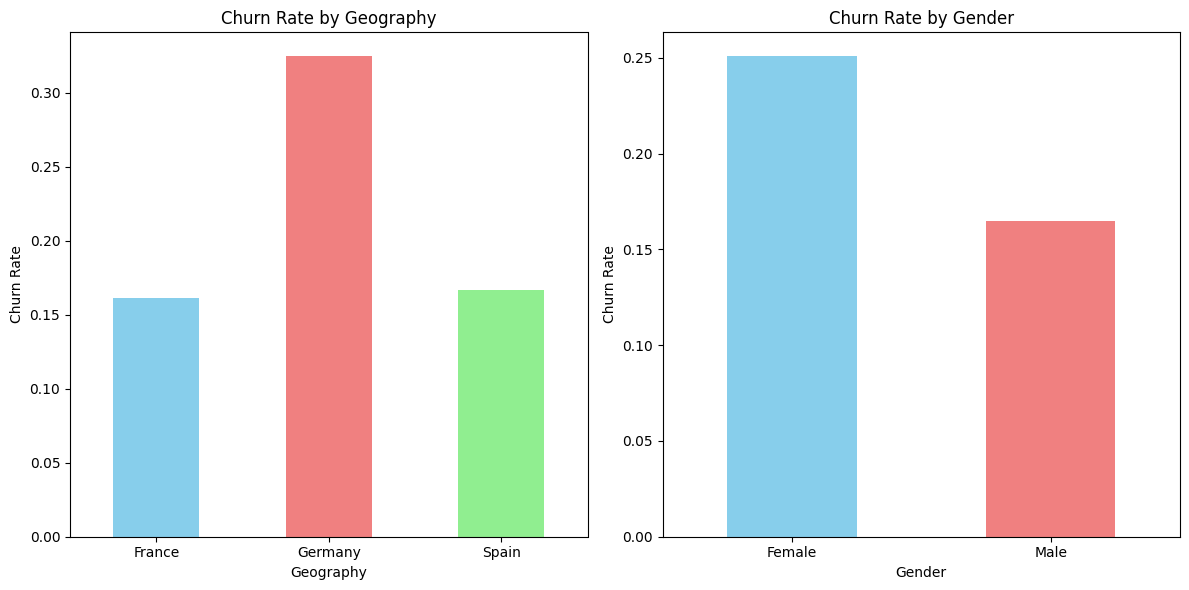

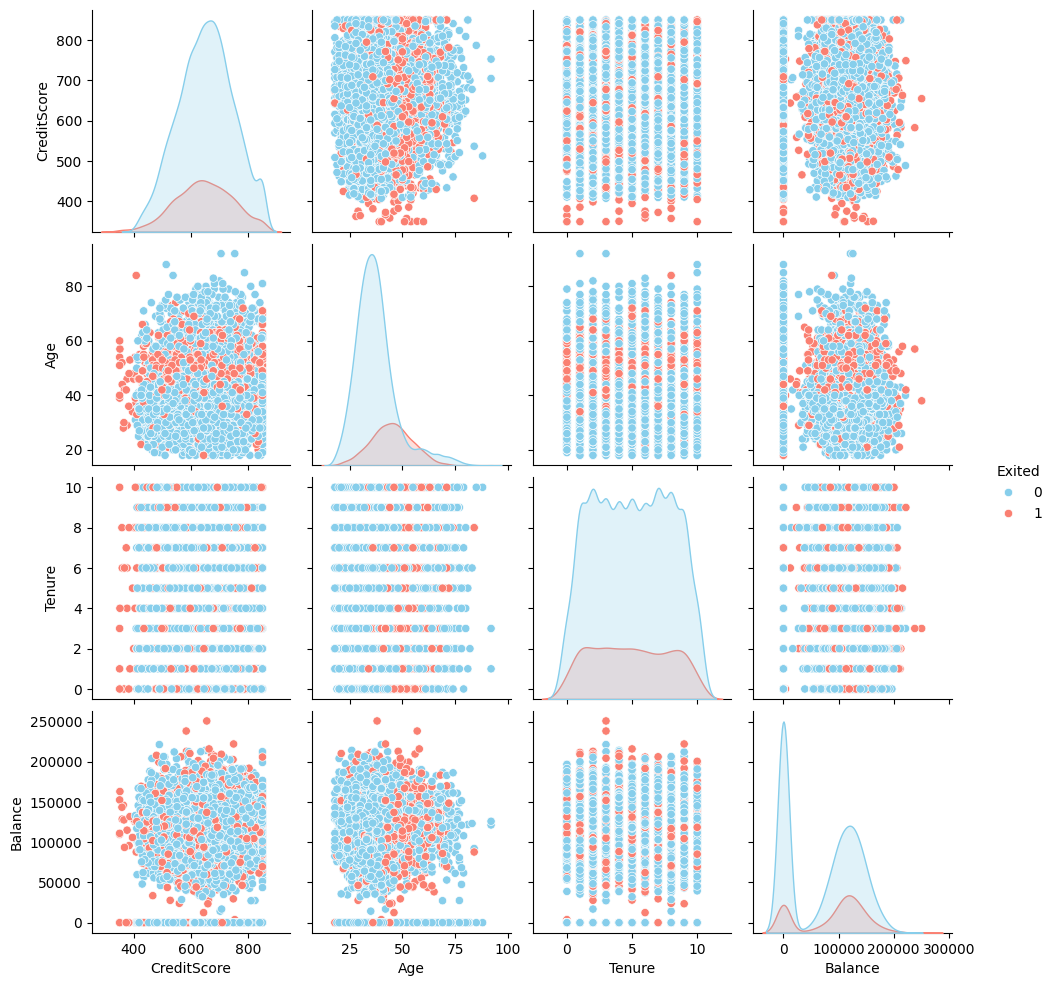

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, hue='Exited', kde=True, palette=['skyblue', 'salmon'])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=col, y='Exited', hue='Exited', palette=['skyblue', 'salmon']) # Corrected hue and y
    plt.title(f'Box Plot of {col} vs Exited')
plt.tight_layout()
plt.show()

# Bar charts for categorical features
plt.figure(figsize=(12, 6))

# Geography
plt.subplot(1, 2, 1)
geography_churn = df.groupby('Geography')['Exited'].mean()
geography_churn.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0) # Rotate x-axis labels for better readability


# Gender
plt.subplot(1, 2, 2)
gender_churn = df.groupby('Gender')['Exited'].mean()
gender_churn.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0) # Rotate x-axis labels

plt.tight_layout()
plt.show()

# Scatter plot matrix (reduced size for better readability)
sns.pairplot(df, vars=numerical_features[:4], hue='Exited', palette=['skyblue', 'salmon'], diag_kind='kde') # Reduced features and added kde to diagonal
plt.show()